In [10]:
import datetime as dt
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf


In [11]:
data = yf.download("BTC-USD")

[*********************100%%**********************]  1 of 1 completed



In [12]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-06-17,66636.515625,67188.320312,65094.964844,66490.296875,66490.296875,30006354476
2024-06-18,66490.976562,66556.703125,64066.957031,65140.746094,65140.746094,39481285950
2024-06-19,65146.660156,65695.351562,64693.300781,64960.296875,64960.296875,21103423504


In [13]:
data['SMA_100'] = ta.SMA(data['Close'], 100)

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA_100
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN
...,...,...,...,...,...,...,...
2024-06-17,66636.515625,67188.320312,65094.964844,66490.296875,66490.296875,30006354476,66710.428984
2024-06-18,66490.976562,66556.703125,64066.957031,65140.746094,65140.746094,39481285950,66671.638555
2024-06-19,65146.660156,65695.351562,64693.300781,64960.296875,64960.296875,21103423504,66600.002461


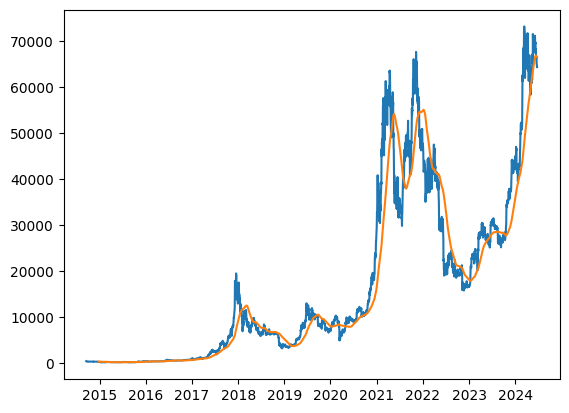

In [15]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])

In [18]:
data['EMA_100'] = ta.EMA(data['Close'], 100)

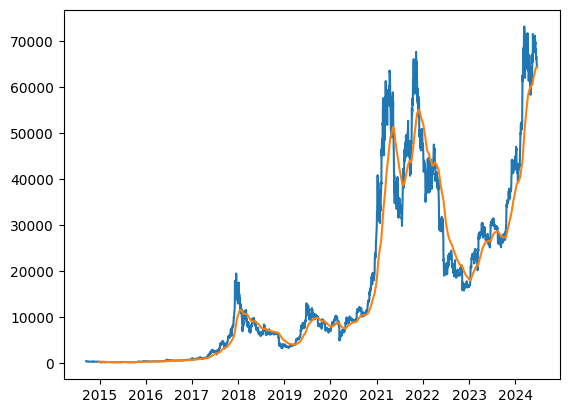

In [19]:
plt.plot(data['Close'])
plt.plot(data['EMA_100'])

In [22]:
data['RSI'] = ta.RSI(data['Close'])

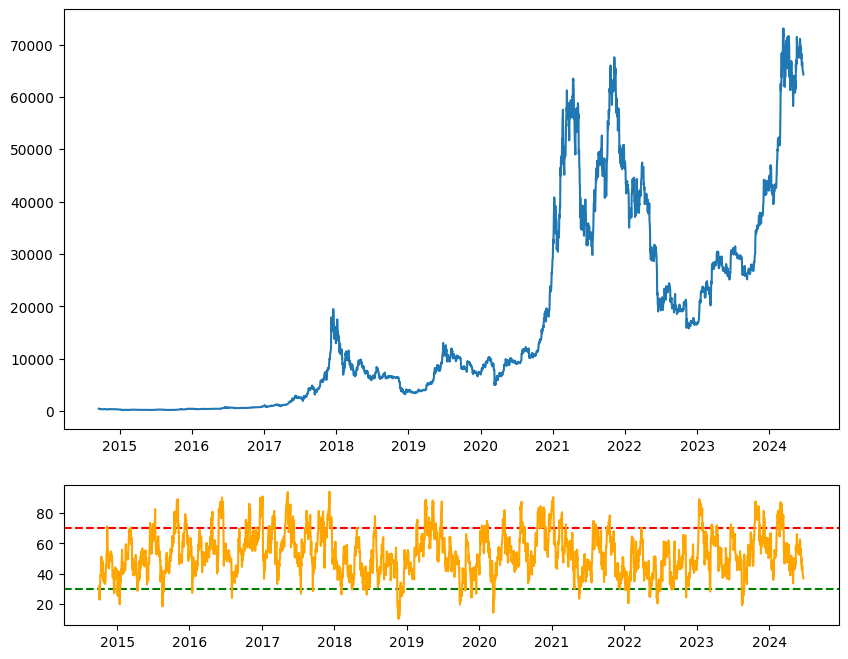

In [23]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 8))

axs[0].plot(data['Close'])
axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(data['RSI'], color="orange")

In [24]:
data['LINEARREG'] = ta.LINEARREG(data['Close'], 200)

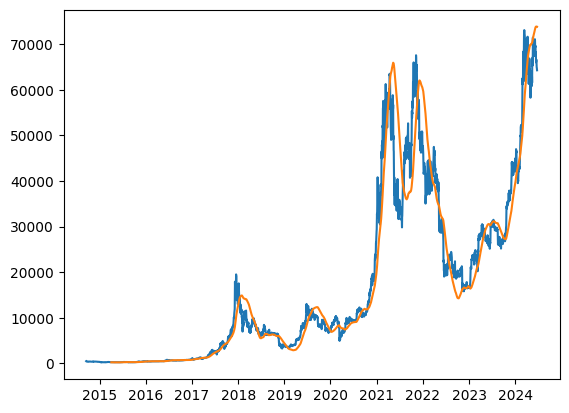

In [25]:
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])

<BarContainer object of 3566 artists>

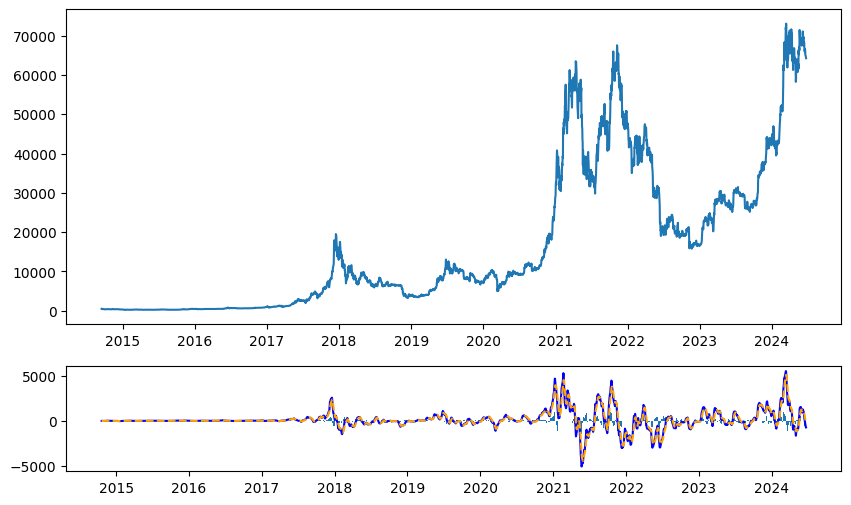

In [26]:
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 6))
axs[0].plot(data['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--',color='orange')
axs[1].bar(macd_hist.index, macd_hist)

<BarContainer object of 3566 artists>

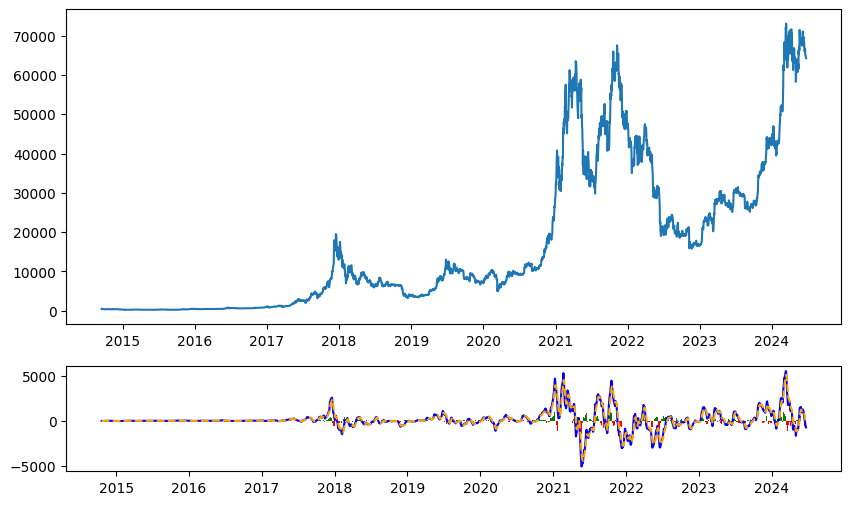

In [27]:
macd, macd_signal, macd_hist = ta.MACD(data['Close'])

fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 6))
c = ["red" if cl < 0 else "green" for cl in macd_hist]
axs[0].plot(data['Close'])
axs[1].plot(macd, 'b-')
axs[1].plot(macd_signal, '--',color='orange')
axs[1].bar(macd_hist.index, macd_hist,color=c)

In [28]:
ta.get_function_groups()

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [29]:
?ta.MACD

Signature:
ta.MACD(
    real,
    fastperiod=-2147483648,
    slowperiod=-2147483648,
    signalperiod=-2147483648,
)
Docstring:
MACD(real[, fastperiod=?, slowperiod=?, signalperiod=?])

Moving Average Convergence/Divergence (Momentum Indicators)

Inputs:
    real: (any ndarray)
Parameters:
    fastperiod: 12
    slowperiod: 26
    signalperiod: 9
Outputs:
    macd
    macdsignal
    macdhist
Type:      function

In [30]:
?ta.CDLENGULFING

Signature: ta.CDLENGULFING(open, high, low, close)
Docstring:
CDLENGULFING(open, high, low, close)

Engulfing Pattern (Pattern Recognition)

Inputs:
    prices: ['open', 'high', 'low', 'close']
Outputs:
    integer (values are -100, 0 or 100)
Type:      function

In [31]:
data['ENGULFING'] = ta.CDLENGULFING(data['Open'], data['High'], data['Low'], data['Close']) 

/Users/oattao/Desktop/learn_trad/learntrad/lib/python3.9/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


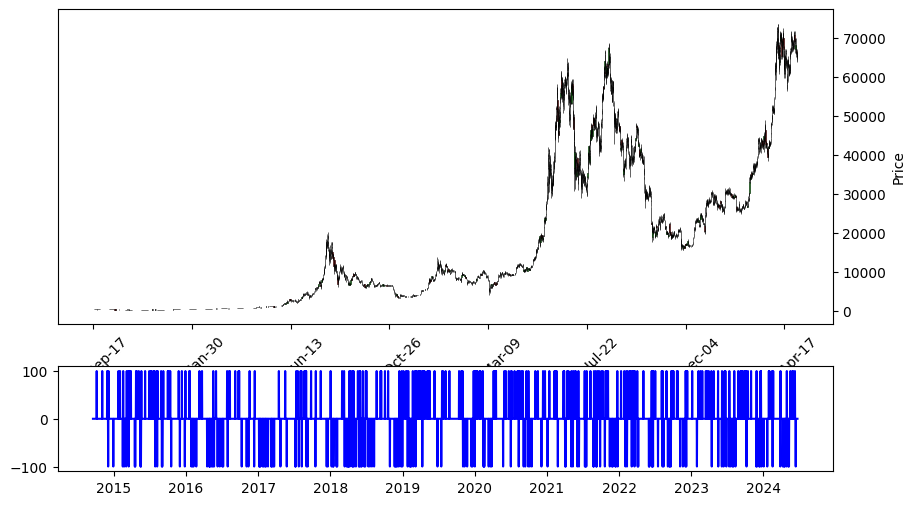

In [34]:
import mplfinance as mpf


fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 6))

colors = mpf.make_marketcolors(up='#00ff00', down='#ff0000')  # Add '#' before 'ff0000'
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=colors)
mpf.plot(data, type='candle', ax=axs[0], style=mpf_style)
axs[1].plot(data['ENGULFING'], color='blue')